# Visión por Computadora 1
## TP 3 
## Alumno: Santiago Fux

In [13]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


#### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template


##### 1. Obtener una detección del logo en cada imagen sin falsos positivos

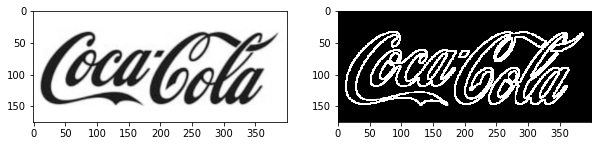

In [14]:
#leo imagen template en gris
template_color = cv.imread('template/pattern.png')
template = cv.cvtColor(template_color, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')


# Obtenemos los bordes por Canny
#===============================
template_edge = cv.Canny(template, 200, 260, apertureSize = 3)
ret, template_edge = cv.threshold(template_edge,128,255,cv.THRESH_BINARY)
plt.subplot(1,2,2)
plt.imshow(template_edge, cmap='gray', vmin=0, vmax=1)



In [15]:
# leo imágenes a procesar
images = ['COCA-COLA-LOGO.jpg', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']
#images = ['coca_logo_2.png']
IMAGES_PATH = 'images/'
w, h = template_edge.shape[::-1]
print(f'tamaño del template: {w}, {h}')


tamaño del template: 400, 175


In [16]:
# for image_name in images:

def detect_coca_cola(image_name):
  image_rgb = cv.imread(IMAGES_PATH + image_name)
  image = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)

  # Aplicar el filtro de mediana
  image = cv.medianBlur(image, 7)
  # aplico bordes y binarizo
  image_edge = cv.Canny(image, 150, 200,L2gradient=True)
  ret, image_edge = cv.threshold(image_edge,180,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
  # obtengo dimensiones de la imagen
  image_w, image_h = image_edge.shape[::-1]

  methods = ['cv.TM_CCORR_NORMED']

  total_max_val = None

  for meth in methods:
    method = eval(meth)

    max_scale_x = image_w / template_edge.shape[1]
    max_scale_y = image_h / template_edge.shape[0]
    if (max_scale_x < max_scale_y):
      max_scale = max_scale_x
    else:
      max_scale = max_scale_y
    scales = np.linspace(max_scale, max_scale / 10, 20)

    for scale in scales:
      # actualizamos tamaño del template
      template_aux = cv.resize(template_edge, None, fx = scale, fy = scale)
      w_aux, h_aux = template_aux.shape[::-1]

      if w_aux > image_w or h_aux > image_h:
        print(f'template is greater than image. Aborting at scale {scale}...')
        break

      # Aplicamos la coincidencia de patrones
      #--------------------------------------
      res = cv.matchTemplate(image_edge, template_aux, method)
    
      # Encontramos los valores máximos y mínimos
      min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
      # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
      if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
          top_left = min_loc
      else:
          top_left = max_loc

      # guardo los maximos
      if total_max_val == None or max_val > total_max_val:
        total_max_val = max_val
        bottom_right = (top_left[0] + w_aux, top_left[1] + h_aux)
        coords = [top_left, bottom_right]
        total_scale = scale
      else:
        # check diff and skip if it greater than n%
        diff = ((total_max_val - max_val) / total_max_val) * 100
        if diff > 8:
          print(f'Skip since score is smaller, diff={diff}...')
          break
        else:
          print(f"Don't skip because diff is only {diff}%")

      # # Marcamos el lugar donde lo haya encontrado
      # #----------------------------------------
      # dbg_bottom_right = (top_left[0] + w_aux, top_left[1] + h_aux)
      # dbg_img_salida = cv.imread(IMAGES_PATH + image_name)
      # cv.rectangle(dbg_img_salida, top_left, dbg_bottom_right, 255, 2)
    
      # # Graficamos el procesamiento y la salida
      # #----------------------------------------
      # plt.figure(figsize=(20,10))

      # print(f'scale = {scale}, max = {max_val}--->')

      # # Resultado de coincidencia
      # plt.subplot(141),plt.imshow(image_edge,cmap = 'gray')
      # plt.title('Original'), plt.xticks([]), plt.yticks([])

      # # Resultado de coincidencia
      # plt.subplot(142),plt.imshow(template_aux,cmap = 'gray')
      # plt.title(f'Template,w={w_aux},h={h_aux}'), plt.xticks([]), plt.yticks([])

      # # Resultado de coincidencia
      # plt.subplot(143),plt.imshow(res,cmap = 'gray')
      # plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
      
      # # Imagen original con recuadros
      # plt.subplot(144),plt.imshow(dbg_img_salida)
      # if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
      #   plt.title(f'Detected Point, Max_val={max_val}'), plt.xticks([]), plt.yticks([])
      # else:
      #   plt.title(f'Detected Point, Min={min_val}'), plt.xticks([]), plt.yticks([])
      
      # plt.suptitle(meth)
      # plt.show()
  return total_max_val, coords 
  
      

Skip since score is smaller, diff=15.113034378078458...


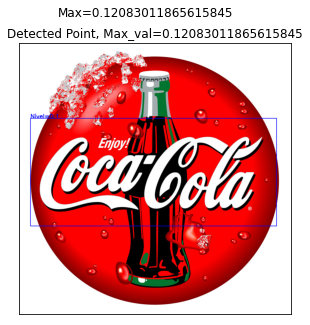

Skip since score is smaller, diff=26.739806199549786...


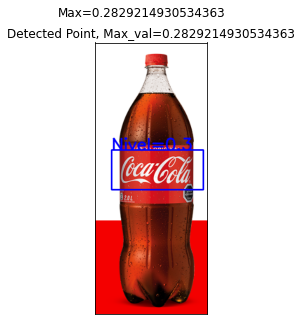

Don't skip because diff is only 4.584345682149404%
Skip since score is smaller, diff=12.383415724384164...


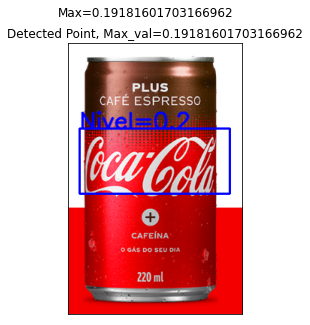

Don't skip because diff is only 1.207371409188867%
Don't skip because diff is only 2.818680115359109%
Don't skip because diff is only 1.8872983011790037%
Don't skip because diff is only 1.5565498795370238%


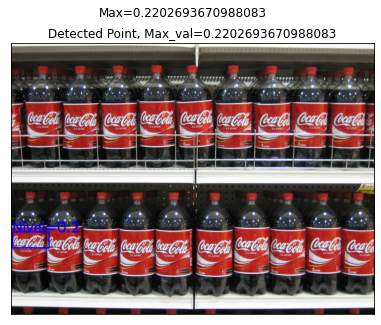

Skip since score is smaller, diff=9.806144141292075...


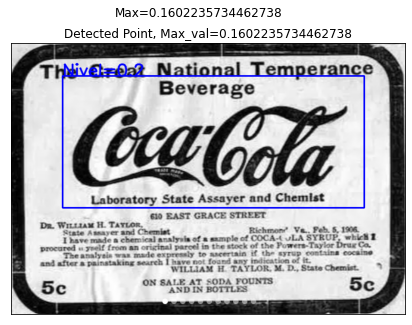

Don't skip because diff is only 5.071470968984122%
Don't skip because diff is only 2.4362045672268366%
Don't skip because diff is only 0.36594213964928335%
Don't skip because diff is only 2.9964523685519637%
Skip since score is smaller, diff=20.29346686167636...


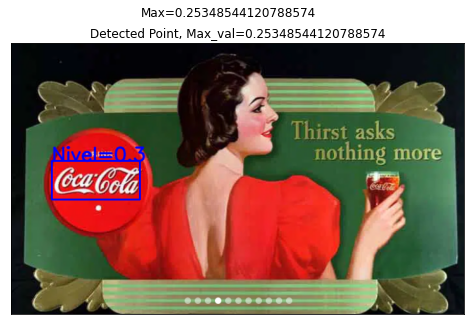

Don't skip because diff is only 0.5776836084378748%
Skip since score is smaller, diff=13.602603256952362...


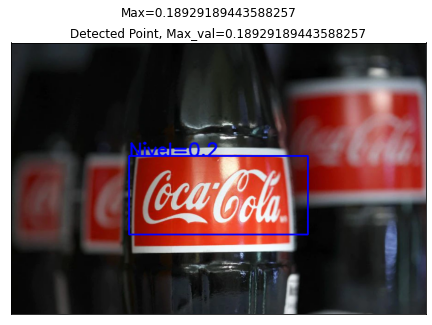

In [17]:
for image_name in images:
  max, coords = detect_coca_cola(image_name)
  img_salida = cv.imread(IMAGES_PATH + image_name)
  img_salida = cv.cvtColor(img_salida, cv.COLOR_BGR2RGB)
  cv.rectangle(img_salida, coords[0], coords[1], (0,0,255), 2)
  level = str(round(max, 1))
  text_start = coords[0]
  cv.putText(img_salida, f'Nivel={level}', text_start, cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv.LINE_AA)
  # Graficamos el procesamiento y la salida
  #   #----------------------------------------
  plt.figure(figsize=(10,5))
  
  #   # Imagen original con recuadros
  plt.subplot(111),plt.imshow(img_salida)
  plt.title(f'Detected Point, Max_val={max}'), plt.xticks([]), plt.yticks([],color='white')
  
  plt.suptitle(f'Max={max}')
  plt.show()

